## Data

To start with a simple example, let’s say that your goal is to build a logistic regression model in Python in order to determine whether candidates would get admitted to a prestigious university.

Here, there are two possible outcomes: Admitted (represented by the value of ‘1’) vs. Rejected (represented by the value of ‘0’).

You can then build a logistic regression in Python, where:

The dependent variable represents whether a person gets admitted; and
The 3 independent variables are the GMAT score, GPA and Years of work experience

In [1]:
# import packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [5]:
# generate data
candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates, columns= ['gmat', 'gpa','work_experience','admitted'])
df.head()

,gmat,gpa,work_experience,admitted
0,780,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1


In [9]:
df.shape

(40, 4)

In [6]:
# separate independent variables (X) and dependent variable/label (y)
X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

In [8]:
# split the data into training and testing set (75% = 30 samples are used training, the rest for testing)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30, 3), (10, 3), (30,), (10,))

## Create Logistic Regression

In [10]:
# fit logistic regression model to training data

logistic_regression = LogisticRegression()    # instantiate model
logistic_regression.fit(X_train,y_train)      # fit model to training data
y_pred = logistic_regression.predict(X_test)  # predict labels for testing data based on fitted model
y_pred

/Users/kacha/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

### Confusion Matrix

In [14]:
# now we have for each sample in test set one true and one predicted label
y_test.values, y_pred

(array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1]), array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1]))

In [11]:
# use true and predicted y values to build confusion matrix by hand using pandas cross table
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,3,2
1,0,5


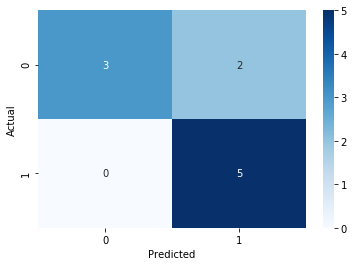

In [19]:
# plot confusion matrix with seaborn
sn.heatmap(confusion_matrix, annot=True, cmap='Blues');

In [20]:
# calculate accuracy using sklearn metrics (Acc = TP+TN / (TP + TN + FP + FN)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8


In [30]:
# for exercise: calculate accuracy by hand
TP = confusion_matrix[1][1]
TN = confusion_matrix[0][0]
Acc = (TP + TN) / confusion_matrix.sum().sum()
Acc

0.8

## Putting it all together (in one cell)

Accuracy:  0.8


/Users/kacha/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


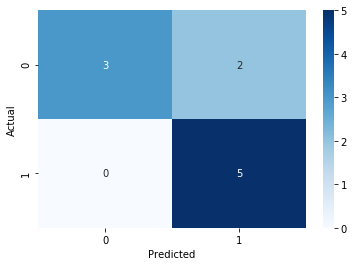

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

candidates = {'gmat': [780,750,690,710,680,730,690,720,740,690,610,690,710,680,770,610,580,650,540,590,620,600,550,550,570,670,660,580,650,660,640,620,660,660,680,650,670,580,590,690],
              'gpa': [4,3.9,3.3,3.7,3.9,3.7,2.3,3.3,3.3,1.7,2.7,3.7,3.7,3.3,3.3,3,2.7,3.7,2.7,2.3,3.3,2,2.3,2.7,3,3.3,3.7,2.3,3.7,3.3,3,2.7,4,3.3,3.3,2.3,2.7,3.3,1.7,3.7],
              'work_experience': [3,4,3,5,4,6,1,4,5,1,3,5,6,4,3,1,4,6,2,3,2,1,4,1,2,6,4,2,6,5,1,2,4,6,5,1,2,1,4,5],
              'admitted': [1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,0,0,1]
              }

df = pd.DataFrame(candidates,columns= ['gmat', 'gpa','work_experience','admitted'])

X = df[['gmat', 'gpa','work_experience']]
y = df['admitted']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True, cmap='Blues');

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))